In [1]:
import pickle

from hampel import hampel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
svr_load_curve = pickle.load(open("svr_load_curve.pk", "rb"))
linear_regression_load_curve = pickle.load(open("linear_regression_load_curve.pk", "rb"))
xgb_load_curve = pickle.load(open("xgb_load_curve.pk", "rb"))

In [3]:
df = pd.read_csv('medidas_04-05-2021/quarterly_measurements_CPD1.csv')

df['total_consumption'] = df['consumption_peak_time'] + df['consumption_off_peak_time'] + df['generated_energy_off_peak_time'] + df['generated_energy_peak_time']

df['collection_date'] = pd.to_datetime(df['collection_date'], format='%Y-%m-%d %H:%M:%S')

df = df.sort_values('collection_date')

df.reset_index(drop=True, inplace=True)

no_outliers_consumption = hampel(df['total_consumption'], window_size=16, n=2, imputation=True)

df['no_outliers_consumption'] = no_outliers_consumption

X = (
    df.collection_date.dt.hour + df.collection_date.dt.minute / 60
).values.reshape((len(df), 1))

y = df.no_outliers_consumption.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

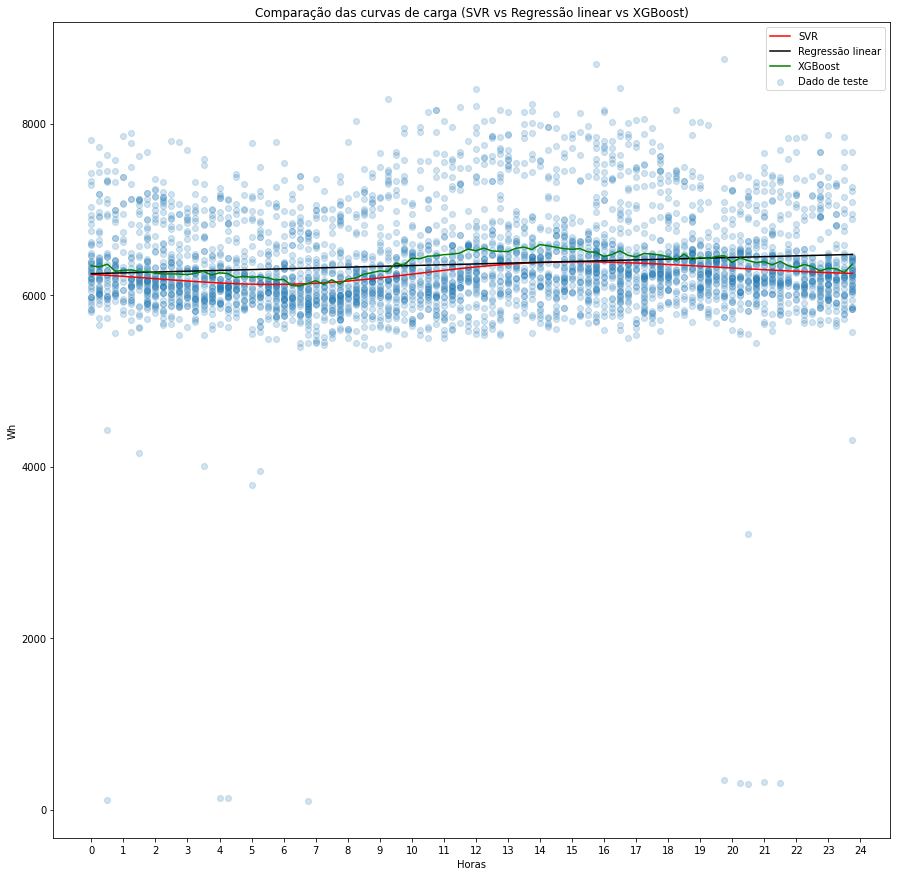

In [4]:
plt.figure(figsize=(15, 15))
plt.title("Comparação das curvas de carga (SVR vs Regressão linear vs XGBoost)")
plt.scatter(X_test, y_test, alpha=0.2, label="Dado de teste")
plt.plot(np.arange(0, 24, 0.25), svr_load_curve, color="red", label="SVR")
plt.plot(np.arange(0, 24, 0.25), linear_regression_load_curve, color="black", label="Regressão linear")
plt.plot(np.arange(0, 24, 0.25), xgb_load_curve, color="green", label="XGBoost")
plt.ylabel("Wh")
plt.xlabel("Horas")
plt.xticks(np.arange(0, 25))
plt.legend();